# K means practical implementation

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [21]:
X, y = make_blobs(n_samples = 1000, centers = 3, n_features = 2)

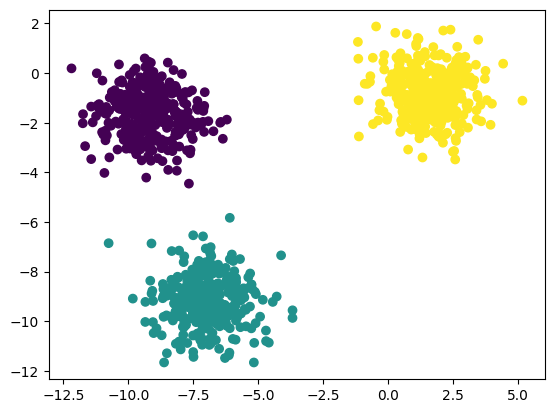

In [22]:
plt.scatter(X[:,0], X[:, 1], c = y)

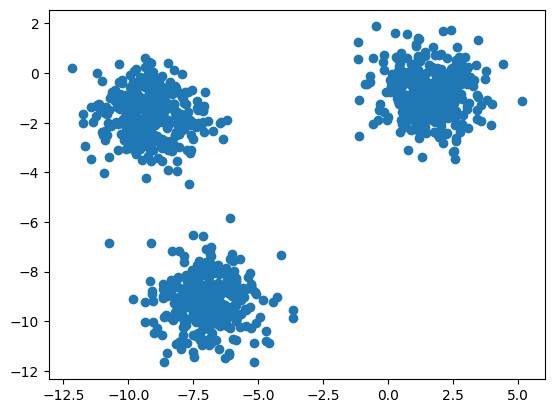

In [23]:
plt.scatter(X[:,0], X[:, 1])

In [24]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 21) :
    clst = KMeans(n_clusters = k, init = 'k-means++')
    clst.fit(X)
    wcss.append(clst.inertia_)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [25]:
wcss

[37798.47663732644,
 12198.941036588561,
 2031.1795541591516,
 1785.090461731871,
 1559.306057314981,
 1338.1228537121176,
 1173.713172899511,
 1034.771360416197,
 905.2052552575599,
 834.0682279381922,
 759.2131352617885,
 694.716258938109,
 659.3347127624542,
 630.2240711504122,
 594.9198253490289,
 561.2679058019548,
 537.1155373187748,
 498.3013873392271,
 473.6852583680503,
 454.4975017286188]

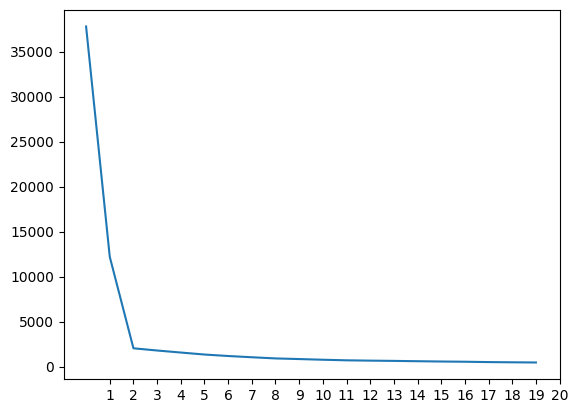

In [26]:
plt.plot(wcss)
plt.xticks(range(1, 21))
plt.show()

No. of clusters = 3

In [27]:
clst = KMeans(n_clusters = 3, init = 'k-means++')

In [28]:
clst.fit(X)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [29]:
y_labels_by_clustering_model = clst.predict(X)

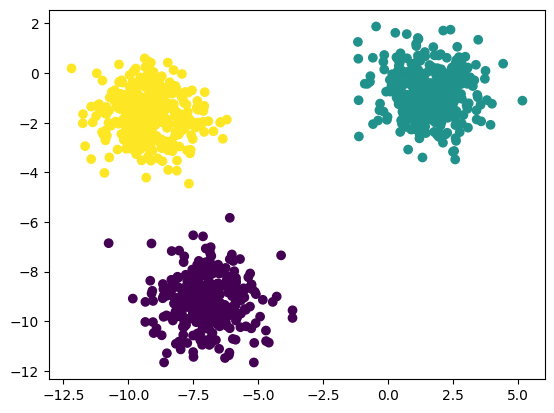

In [30]:
plt.scatter(X[:,0], X[:, 1], c = y_labels_by_clustering_model)

But if we have a huge dataset then we are unable to locate the knee point. We use knee locator.

In [31]:
from kneed import KneeLocator
k1 = KneeLocator(range(1, 21), wcss, curve = 'convex', direction = 'decreasing')
k1.elbow

3

# Silhoutte score

In [32]:
from sklearn.metrics import silhouette_score
silhoutte_coefficients = []
for k in range(2, 21) :
    clst = KMeans(n_clusters = k, init = 'k-means++')
    clst.fit(X)
    score = silhouette_score(X, clst.labels_)
    silhoutte_coefficients.append(score)

/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/config/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [33]:
silhoutte_coefficients

[0.6628525104894258,
 0.7921794459388117,
 0.6354276816773209,
 0.4890948070885518,
 0.31655244368237356,
 0.3340578331069984,
 0.33839515915901464,
 0.34432728138624286,
 0.34060381369327003,
 0.3426972876073484,
 0.3281201669481191,
 0.3321337510151427,
 0.3226144811440452,
 0.3311745471332697,
 0.32141094815321297,
 0.3213176802167928,
 0.32525059198826267,
 0.3245426266918376,
 0.3256681650199754]

# Plotting silhouette scores

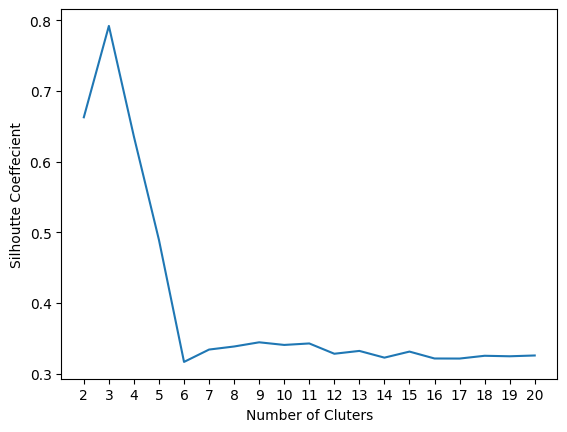

In [36]:
plt.plot(range(2, 21), silhoutte_coefficients)
plt.xticks(range(2,21))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

When k = 3, the score is closest to 1.